In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision',3)

In [2]:
df = pd.read_csv('./python_stat_sample-master/data/ch2_scores_em.csv',index_col='student number')

In [7]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 두 데이터 사이의 관계를 나타내는 지표

양의 상관관계 : A가 높은 수치를 나타낼 때 B도 높은 수치를 나타내는 관계
음의 상관관계 : A가 높은 수치를 나타낼 때 B는 반대의 수치를 나타내는 관계
무상관 : A와 B가 아무 관계가 없는 관계

### 공분산
$$cov(X,Y) = E[(X-\mu_{x})(Y-\mu_{y})]$$


분산은 편차들의 분산정도만 나타낼 수 있어 항상 양의 값을 갖는다. 따라서 양의 상관관계와 음의 상관관계를 구분할 수 없는 특징이 있다

하지만 공분산은 편차들의 분산정도 뿐만 아니라 양의 상관관계와 음의 상관관계 또한 나타낼 수 있다.

- 공분산이 양의 값이면 양의 상관관계
- 공분산이 음의 값이면 음의 상관관계
- 공분산이 0에 가까우면 무관계에 가깝다

In [8]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [9]:
# 공분산은 62.8
# 따라서 영어점수와 수학 점수는 양의 상관관계에 있다고 할 수 있다
summary_df['product of deviations'].mean()

62.8

Numpy의 경우, 공분산은 cov 함수로 구할 수 있다. 다만, 반환값은 공분산값이 아닌 **공분산 행렬(covariance matrix)** 또는 **분산 공분산 행렬(variance-covariance matrix)** 라고 부르는 행렬이다

np.cov(a,b)라고 했을 때,
- 반환행렬의 (0,0)값은 a와 a의 공분산 (a의 분산)
- (0,1)값은 a와 b의 공분산
- (1,0)값은 b와 a의 공분산
- (1,1)값은 b와 b의 공분산 (b의 분산)

In [11]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

(62.800000000000004, 62.800000000000004)

In [15]:
scores_df.cov()

,english,mathematics
english,95.556,69.778
mathematics,69.778,76.044


### 상관계수
시험 점수끼리의 공분산은(점수,점수)라는 단위를 사용한다. 학생의 키와 시험 점수의 상관관계는 (cm,점수)라는 단위가 되어 직감적으로 이해하기 힘듬

단위에 의존하는 공분산과는 달리 단위에 의존하지 않는 상관을 나타내는 지표가 상관계수이다

공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의할 수 있다

$$r_{xy} = \frac{S_{xy}}{S_{x}S_{y}}= \frac{1}{n}\sum_{i=1}^n(\frac{x_{i} - \bar{x}}{S_{x}})(\frac{y_{i} - \bar{y}}{S_{y}})$$

이와 같이 정의된 지표 $r_{xy}$를 **상관계수(correlation coefficient)** 라고 한다

- 상관계수는 반드시 -1과 1 사이의 값을 취한다
- 데이터가 양의 상관관계에 놓여 있을수록 1에 가까워진다
- 음의 상관관계에 놓여 있을수록 -1에 가까워진다.
- 무상관이면 0이된다
- 상관계수가 -1일 때와 1일 때에는 데이터가 완전히 직선상에 놓인다

In [16]:
np.cov(en_scores,ma_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

In [17]:
np.corrcoef(en_scores,ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [18]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

### 산점도

scatter 메서드를 사용하여 산점도를 그릴 수 있다. scatter 의 첫번째 인수가 x축의 데이터, 두 번째 인수가 y축의 데이터

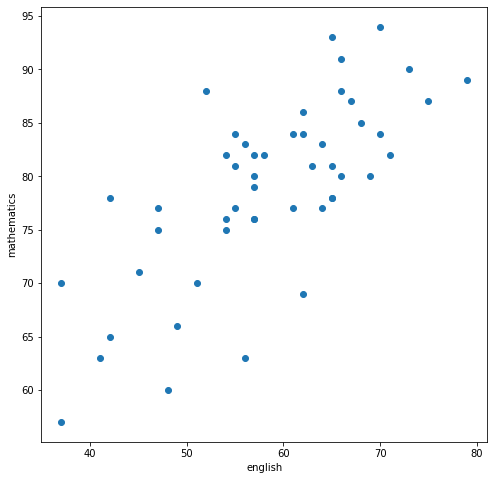

In [21]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#산점도
ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 회귀직선(Regression line)

두 데이터간의 관계와 가장 유사한 직선

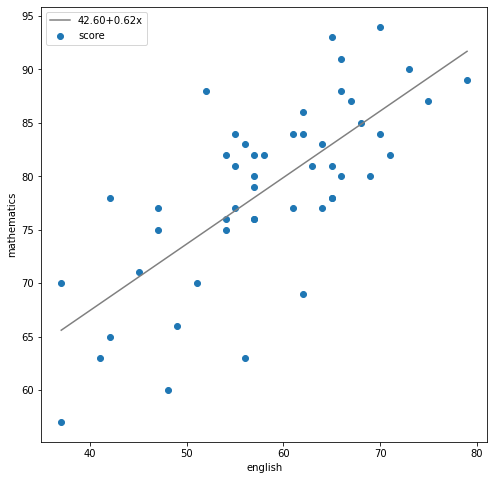

In [24]:
poly_fit = np.polyfit(english_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys=poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

plt.show()

### 히트맵(Heat Map)

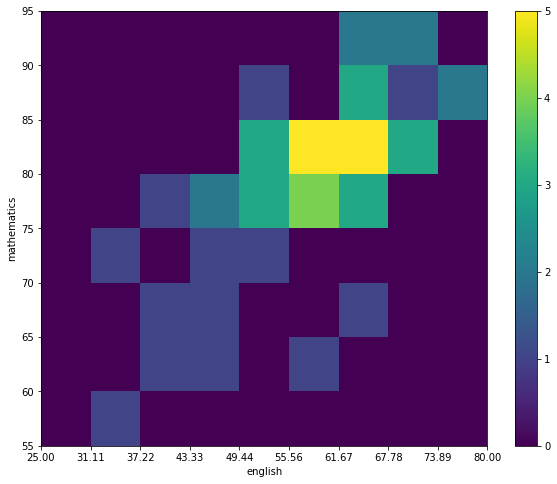

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# x축과 y축이 각각 5점 간격이 되도록 bins을 설정
c = ax.hist2d(english_scores, math_scores, bins=[9,8],range=[(25,80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

## 앤스컴의 예
앤스컴 콰르텟은 평균, 표본분산, 상관, 선형회귀선, 결정계수 등의 기술통계량은 동일하지만, 분포나 그래프를 이요하여 시각화하면 전혀 다른 4개의 데이터 세트를 의미한다
시각화의 중요성을 강조하는 이론

In [36]:
anscombe_data = np.load('./python_stat_sample-master/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data

(4, 11, 2)


array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [38]:
# 각 데이터의 평균, 분산 , 상관계수, 회귀직선을 계산하여 DataFrame으로 정리한다
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    print(dataX)
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']

# 모든 데이터가 일치한다    
stats_df

[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[ 8.  8.  8.  8.  8.  8.  8. 19.  8.  8.  8.]


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


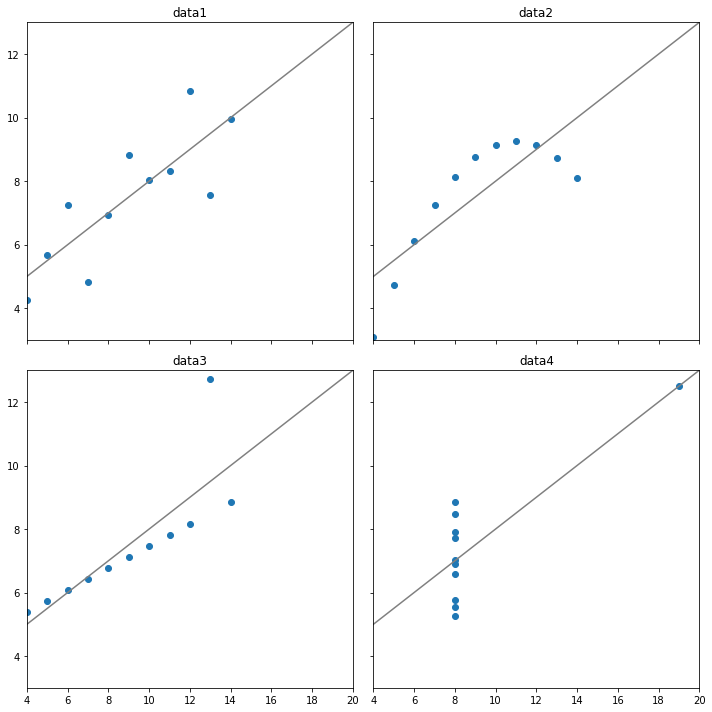

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10),sharex=True,sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    #타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')

#그래프 사이의 간격을 좁힌다
plt.tight_layout()
plt.show()

**그림에서 볼 수 있듯이 같은 회귀직선을 갖고, 평균, 분산, 상관계수등 같은 값이 많았지만 데이터의 분포는 전혀 다르다.**

**앤스컴의 예는 데이터를 분석할 때는 가능하면 그림을 그려야 한다는 것을 알려주고 있다**